In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


airline = pd.read_csv("./customer_airways_data.csv", encoding="iso-8859-1")
airline.drop_duplicates(inplace=True)

In [108]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ 

#### Graficamos las variables categoricas

/tmp/ipykernel_50430/1721016373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=airline,ax=ax[i],palette=colors)
/tmp/ipykernel_50430/1721016373.py:10: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col,data=airline,ax=ax[i],palette=colors)
/tmp/ipykernel_50430/1721016373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=airline,ax=ax[i],palette=colors)
/tmp/ipykernel_50430/1721016373.py:10: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(x=col,data=airline,ax=ax[i],palette=colors)
/tmp/ipykernel_50430/1721016373.py:10: FutureWarni

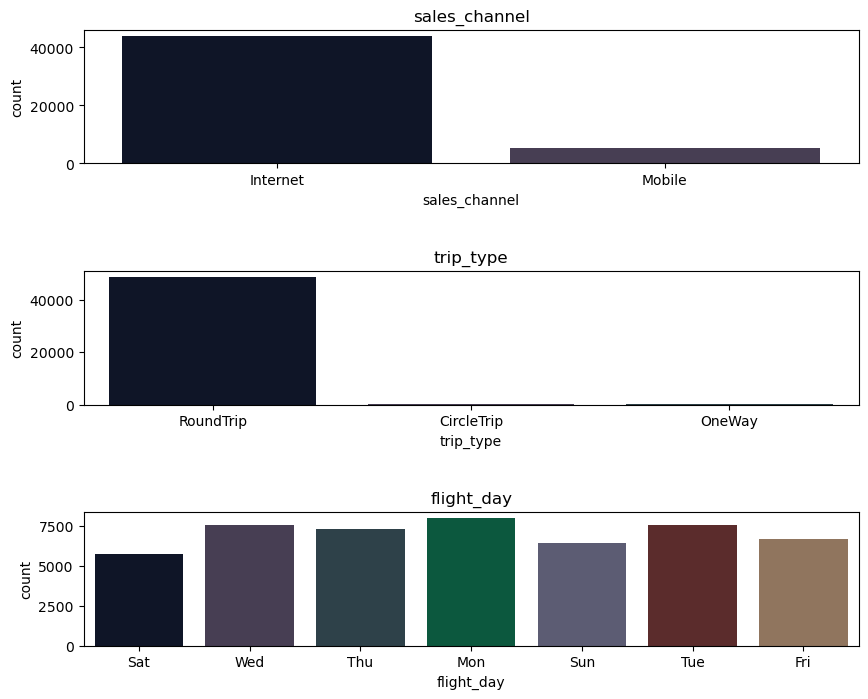

In [109]:
col_categoricas = ["sales_channel","trip_type","flight_day"]
colors = [ "#0b132b","#473a57","#29434e","#006442","#585877","#632424","#987456",]


fig,ax = plt.subplots(nrows=len(col_categoricas), ncols=1,figsize=(10,8))
fig.subplots_adjust(hspace=0.8)


for i,col in enumerate(col_categoricas):
  sns.countplot(x=col,data=airline,ax=ax[i],palette=colors)
  ax[i].set_title(col)


  

In [110]:
df_sales_channel = airline.sales_channel.value_counts().to_frame()
df_sales_channel["%"] = df_sales_channel["sales_channel"] * 100 / df_sales_channel["sales_channel"].sum()

df_trip_type = airline.trip_type.value_counts().to_frame()
df_trip_type["%"] = df_trip_type.trip_type * 100 / df_trip_type.trip_type.sum()

df_flight_day = airline.flight_day.value_counts().to_frame()
df_flight_day["%"] = df_flight_day.flight_day * 100 / df_flight_day.flight_day.sum()

print(df_sales_channel)
print(df_flight_day)
print(df_trip_type)

          sales_channel          %
Internet          43917  89.115481
Mobile             5364  10.884519
     flight_day          %
Mon        7988  16.209087
Wed        7562  15.344656
Tue        7558  15.336539
Thu        7323  14.859682
Fri        6685  13.565066
Sun        6442  13.071975
Sat        5723  11.612995
            trip_type          %
RoundTrip       48779  98.981352
OneWay            386   0.783263
CircleTrip        116   0.235385


### Primeras conclusiones:
  #### 1. Dominio de Internet como canal de venta: 
  + El canal de venta preferido por los clientes es Internet, con un 89.12% de las reservas.
Esto representa una clara preferencia por la comodidad y flexibilidad que ofrece la compra online.

  #### 2. Viajes de ida y vuelta: la opción favorita:
  + El tipo de viaje más elegido es el de ida y vuelta, con una amplia mayoría en las reservas. Esta tendencia indica que los clientes buscan viajes completos, tanto de ida como de regreso.

#### 3. Equilibrio en la elección de días:
  + Se observa un equilibrio en los días seleccionados para las reservas, con el lunes como el día con mayor número de reservas.
Esto sugiere que no hay un día de la semana que sea claramente preferido por los clientes para realizar sus reservas.

En resumen, estas primeras conclusiones revelan:

+ Una fuerte preferencia por las ventas online.
+ Prevalencia de los viajes de ida y vuelta.
+ Igualdad en la elección del día de la reserva.


#### Dado que tenemos una columna "Booking_complete", centraremos el analisis en tratar de predecir la posibilidad de completar la reserva

In [111]:
airline.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


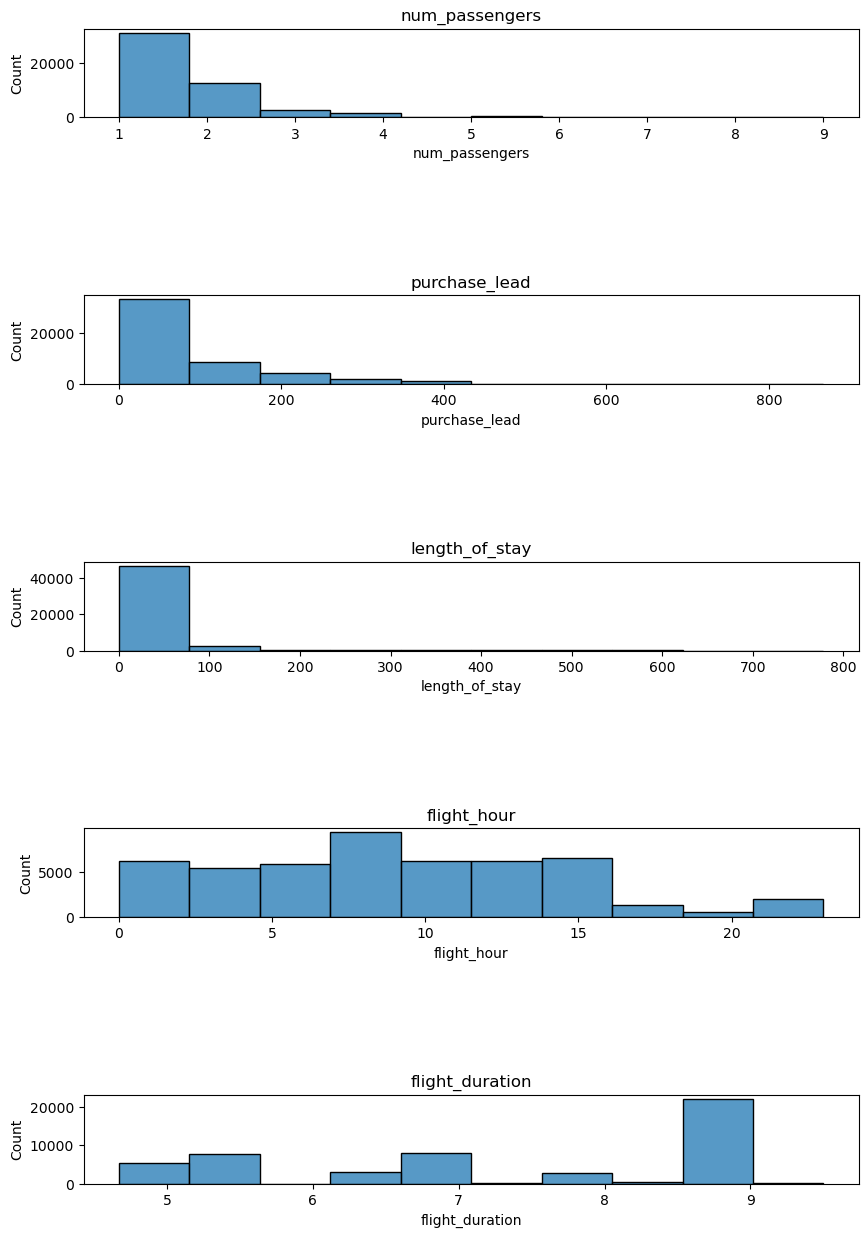

In [112]:
col_numericas = ["num_passengers","purchase_lead","length_of_stay","flight_hour","flight_duration"]

fig,ax = plt.subplots(nrows=len(col_numericas),ncols=1,figsize=(10,15))
fig.subplots_adjust(hspace=2)

for i,col in enumerate(col_numericas):
  sns.histplot(x=col,data=airline,ax=ax[i],bins=10,kde=False)
  ax[i].set_title(col)

### Análisis entre variables numéricas y booking_complete

### Objetivo:

#### El objetivo de este análisis es determinar la relación entre las variables numéricas que tenemos disponibles (numro de pasajeros, duración del viaje, etc.) y la variable objetivo, que es si la reserva se completó o no (booking_complete).

<AxesSubplot:xlabel='booking_complete', ylabel='num_passengers'>

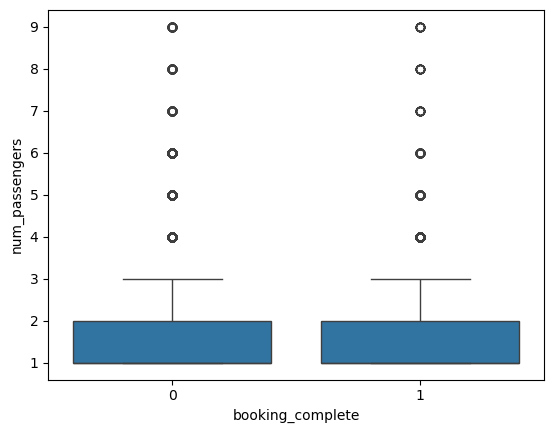

In [113]:
sns.boxplot(data=airline,x=airline["booking_complete"],y=airline["num_passengers"])


Text(0.5, 1.0, 'Number of passengers complete reservation')

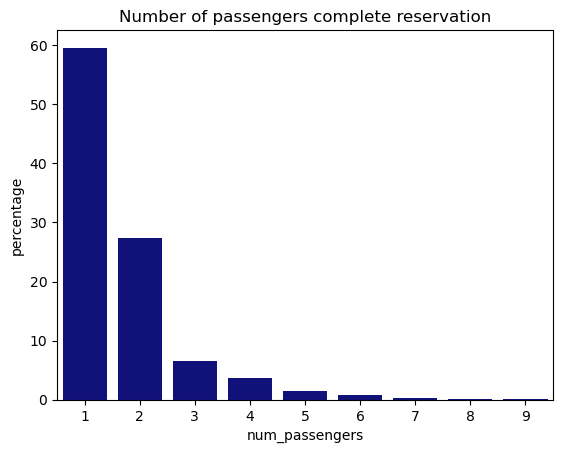

In [114]:
df_booking_complete_per_passengers = airline.loc[airline.booking_complete == 1,"num_passengers"].value_counts()
df_booking_complete_per_passengers = df_booking_complete_per_passengers.to_frame()
df_booking_complete_per_passengers["%"] = df_booking_complete_per_passengers.num_passengers * 100 / df_booking_complete_per_passengers.num_passengers.sum()


df_booking_not_complete_per_passengers = airline.loc[airline.booking_complete == 0,"num_passengers"].value_counts()
df_booking_not_complete_per_passengers = df_booking_not_complete_per_passengers.to_frame()
df_booking_not_complete_per_passengers["%"] = df_booking_not_complete_per_passengers.num_passengers * 100 / df_booking_not_complete_per_passengers.num_passengers.sum()

sns.barplot(data=df_booking_complete_per_passengers,x=[1,2,3,4,5,6,7,9,8],y=df_booking_complete_per_passengers["%"],color="darkblue")
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Number of passengers complete reservation")


Text(0.5, 1.0, 'Number of passengers not complete reservation')

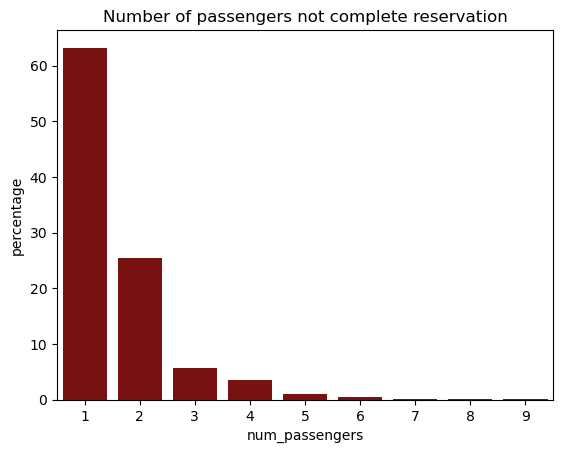

In [115]:
sns.barplot(data=df_booking_not_complete_per_passengers,x=[1,2,3,4,5,6,7,8,9],y=df_booking_not_complete_per_passengers["%"],color="darkred")
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Number of passengers not complete reservation")

Text(0.5, 1.0, 'Percentage comparison of numbers of passengers who complete or do not complete the reservation')

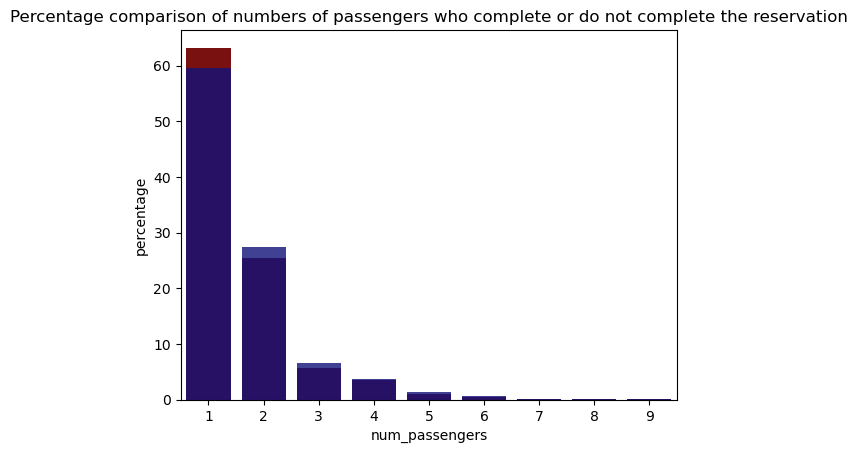

In [116]:
sns.barplot(data=df_booking_not_complete_per_passengers,x=[1,2,3,4,5,6,7,8,9],y=df_booking_not_complete_per_passengers["%"],color="darkred")
sns.barplot(data=df_booking_complete_per_passengers,x=[1,2,3,4,5,6,7,9,8],y=df_booking_complete_per_passengers["%"],color="darkblue",alpha=0.8,width=0.8)
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Percentage comparison of numbers of passengers who complete or do not complete the reservation")



### Análisis comparativo de reservas: Boxplot y Barplot

#### En este análisis, comparamos la cantidad de pasajeros que completaron una reserva con aquellos que no la completaron. Para ello, se analizaron dos tipos de gráficos: boxplot y barplot.

#### Boxplot: No se observan diferencias significativas en la distribución de la cantidad de pasajeros entre ambos grupos. Las medianas son similares y las cajas (intercuartiles) se superponen en gran medida.
#### Barplot: Se observa que la cantidad de reservas completadas es menor que la de reservas no completadas. Esta diferencia es considerable, con una barra más alta para las reservas no completadas, pero con medidas porcentuales practicamente identicas

### Conclusiones:

#### No hay diferencias significativas en la cantidad de pasajeros entre quienes completan y no completan una reserva. En cuanto a la cantidad de reservas completadas, es menor que la de reservas no completadas. Resulta insignificante la diferencias en la cantidad de pasajeros son tan pequeñas que pueden considerarse irrelevantes. El análisis conjunto del boxplot y barplot permite concluir que si bien hay una menor cantidad de reservas completadas, esta diferencia no es significativa en términos de la cantidad de pasajeros. Aunque podriamos afirmar que la tasa de éxito de las reservas es mayor cuanto menor es la cantidad de pasajeros en reserva del vuelo, lo mismo ocurre al rechazarla, por lo que debemos obsewrvar que otras variables influyen.



In [117]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 6.6+ 

#### Determinaremos si existe una relación entre la variable purchase_lead (Número de días entre el momento de la reserva y el momento del viaje) y la variable booking_complete (la reserva se completó o no).

In [118]:
df_purchase_lead = airline[["purchase_lead","booking_complete"]]

print(f'Cantidad de datos "Purchase_lead": {len(df_purchase_lead.purchase_lead.value_counts())}')
print(f'Cantidad de datos "Booking_complete": {len(df_purchase_lead.booking_complete.value_counts())}')


Cantidad de datos "Purchase_lead": 470
Cantidad de datos "Booking_complete": 2


##### De lo anterior, concluimos que es recomendable un violinplot, por el tamaño de muestras con el que trabajaremos

/tmp/ipykernel_50430/3203823931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchase_lead["booking_complete"] = df_purchase_lead["booking_complete"].replace({0: "No", 1:"Yes"})


<AxesSubplot:xlabel='booking_complete', ylabel='purchase_lead'>

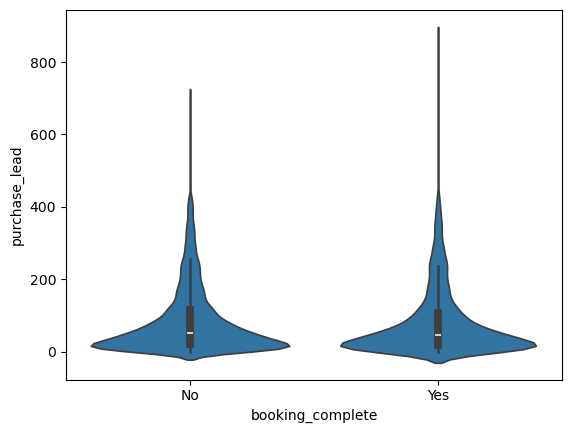

In [119]:
df_purchase_lead["booking_complete"] = df_purchase_lead["booking_complete"].replace({0: "No", 1:"Yes"})
sns.violinplot(data=df_purchase_lead,x=df_purchase_lead.booking_complete,y=df_purchase_lead.purchase_lead)

#### Distribución de la variable:

##### El gráfico muestra una distribución con picos principales al mismo nivel, viendose valores atipicos por sobre los 600. A simple vista no podemos obtener una clara conclusion del grafico en cuanto a la tendencia de reserva completa o no.

##### Veremos como se relaciona con la cantidad de pasajeros


/tmp/ipykernel_50430/1715447731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mult_var["num_passengers"] = airline["num_passengers"]


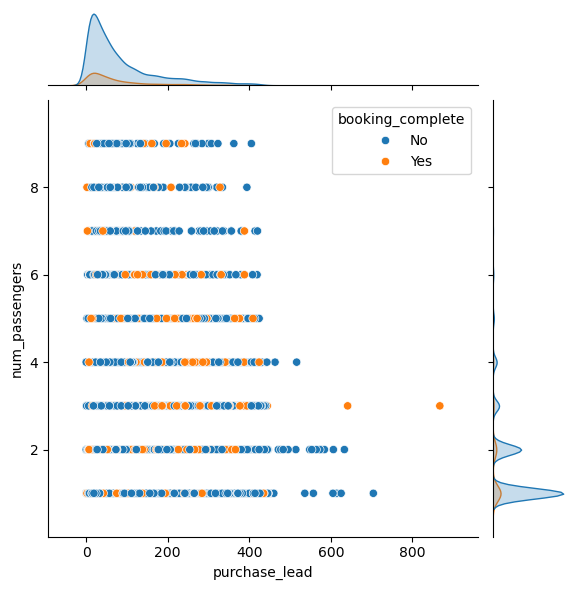

In [120]:
df_mult_var = df_purchase_lead
df_mult_var["num_passengers"] = airline["num_passengers"]
sns.jointplot(data=df_mult_var,x="purchase_lead",y="num_passengers",hue="booking_complete")


#### Análisis de Valores Atípicos:
##### En grupos de 3 personas con largos periodos entre reserva y viaje, se observan respuestas positivas en algunos casos, pero al analizar el gráfico, se evidencia que son casos muy aislados y repitiendose en reservas individuales con periodos mayores a 500 días.

##### Si bien hay casos atípicos con respuestas positivas para largos periodos entre reserva y viaje, estos no son representativos del conjunto general de datos.

#### Los valores atípicos encontrados no invalidan la tendencia general de los datos. por lo tanto no seran parte de la base para tomar una conclusion

In [121]:
airline_filter_per_purchase_lead = airline.loc[airline.purchase_lead < 500,:]
airline_filter_per_purchase_lead.shape


(49263, 14)

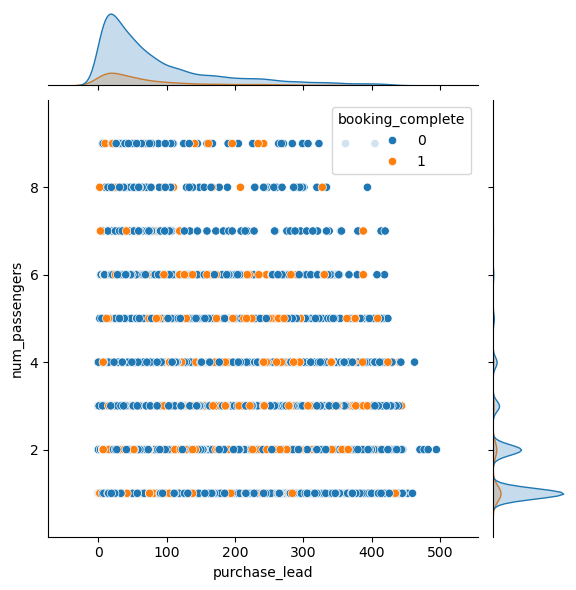

In [122]:
sns.jointplot(data=airline_filter_per_purchase_lead,x="purchase_lead",y="num_passengers",hue="booking_complete")

#### Notando que el numero de rechazo de reservas es muy superior, intentaremos analizar el motivo.

##### ¿Hay algun tipo de viaje mas rechazado ?

,booking_complete,trip_type,quantity
0,no,CircleTrip,111
1,si,CircleTrip,5
2,no,OneWay,366
3,si,OneWay,20
4,no,RoundTrip,41397
5,si,RoundTrip,7364


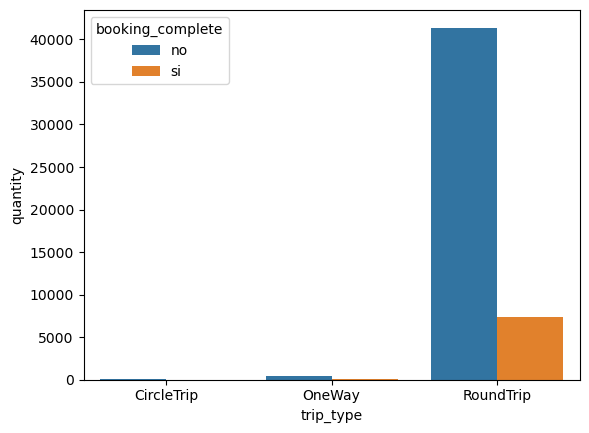

In [232]:
group = airline_filter_per_purchase_lead.groupby("trip_type")["booking_complete"].value_counts().to_frame().reset_index(level=0).rename(columns={"booking_complete": "quantity"}).reset_index()

group["booking_complete"] = group["booking_complete"].replace({0: "no", 1: "si"})

sns.barplot(data=group,x="trip_type",y="quantity",hue="booking_complete")
group

##### Observamos un alto número de reservas rechazadas para el tipo RoundTrip 
#### Para comprender mejor esta situación, analizaremos la cantidad de pasajeros que corresponde a estas reservas, lo que nos permitirá, visualizar la información para identificar patrones.


<AxesSubplot:xlabel='num_passengers', ylabel='quantity'>

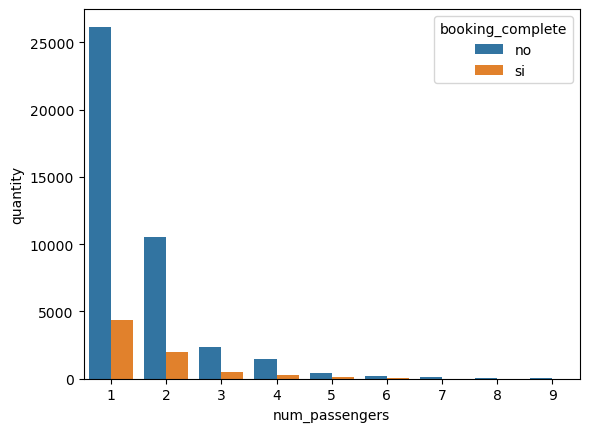

In [244]:
group = airline_filter_per_purchase_lead.loc[airline_filter_per_purchase_lead.trip_type == "RoundTrip",:]

group = group.groupby("num_passengers")["booking_complete"].value_counts().to_frame().rename(columns={"booking_complete": "quantity"}).reset_index()
group.booking_complete = group.booking_complete.replace({0: "no", 1:"si"})

sns.barplot(data=group,x="num_passengers",y="quantity",hue="booking_complete")

#### Hacemos un zoom para los pasajeros de 3 a 9

<AxesSubplot:xlabel='num_passengers', ylabel='quantity'>

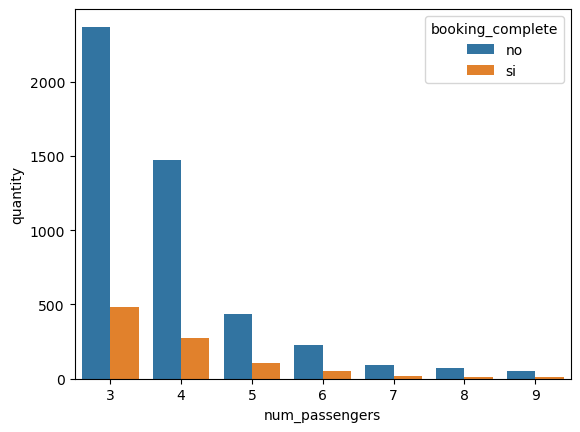

In [245]:
group = airline_filter_per_purchase_lead.loc[(airline_filter_per_purchase_lead.trip_type == "RoundTrip") & (airline_filter_per_purchase_lead.num_passengers >2),:]

group = group.groupby("num_passengers")["booking_complete"].value_counts().to_frame().rename(columns={"booking_complete": "quantity"}).reset_index()
group.booking_complete = group.booking_complete.replace({0: "no", 1:"si"})

sns.barplot(data=group,x="num_passengers",y="quantity",hue="booking_complete")

#### Seguimos nuestro analisis pero ahora centrados en OneWay

<AxesSubplot:xlabel='num_passengers', ylabel='quantity'>

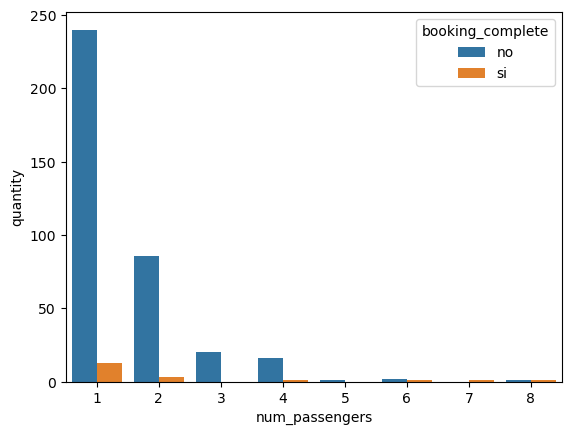

In [246]:
group = airline_filter_per_purchase_lead.loc[airline_filter_per_purchase_lead.trip_type == "OneWay",:]

group = group.groupby("num_passengers")["booking_complete"].value_counts().to_frame().rename(columns={"booking_complete": "quantity"}).reset_index()
group.booking_complete = group.booking_complete.replace({0: "no", 1:"si"})

sns.barplot(data=group,x="num_passengers",y="quantity",hue="booking_complete")

#### Analicemos que sucede para mas de 3 pasajeros

<AxesSubplot:xlabel='num_passengers', ylabel='quantity'>

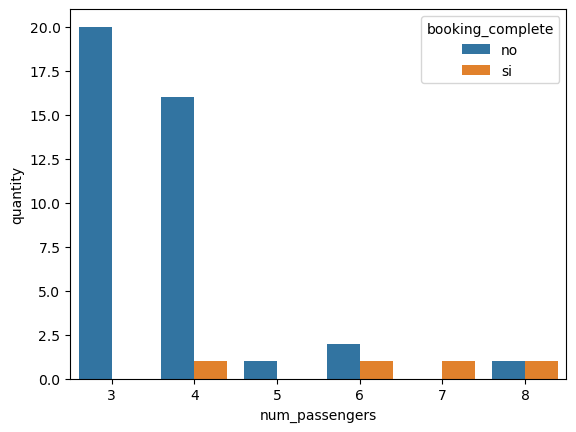

In [247]:
group = airline_filter_per_purchase_lead.loc[(airline_filter_per_purchase_lead.trip_type == "OneWay") & (airline_filter_per_purchase_lead.num_passengers >2),:]

group = group.groupby("num_passengers")["booking_complete"].value_counts().to_frame().rename(columns={"booking_complete": "quantity"}).reset_index()
group.booking_complete = group.booking_complete.replace({0: "no", 1:"si"})

sns.barplot(data=group,x="num_passengers",y="quantity",hue="booking_complete")

<AxesSubplot:xlabel='num_passengers', ylabel='quantity'>

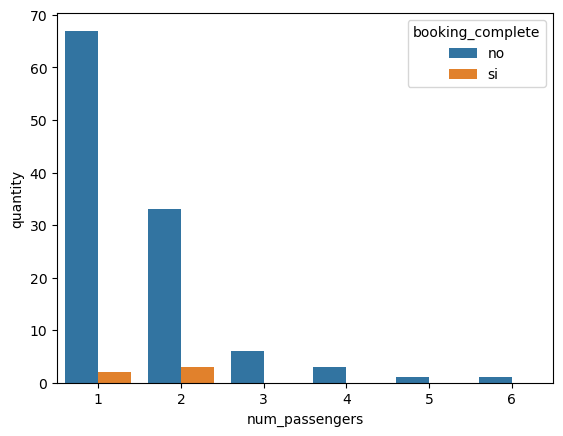

In [248]:
group = airline_filter_per_purchase_lead.loc[airline_filter_per_purchase_lead.trip_type == "CircleTrip",:]

group = group.groupby("num_passengers")["booking_complete"].value_counts().to_frame().rename(columns={"booking_complete": "quantity"}).reset_index()
group.booking_complete = group.booking_complete.replace({0: "no", 1:"si"})

sns.barplot(data=group,x="num_passengers",y="quantity",hue="booking_complete")

#### Que ocurre al comparar con el purchase_lead ?

#### 1. RoundTrip:

<AxesSubplot:xlabel='num_passengers', ylabel='purchase_lead'>

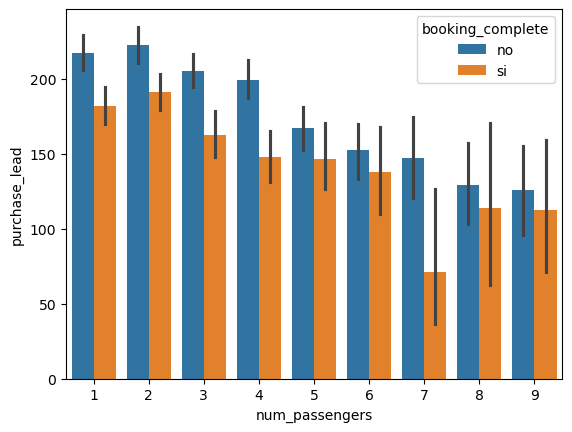

In [251]:
group = airline_filter_per_purchase_lead.loc[airline_filter_per_purchase_lead.trip_type == "RoundTrip",:]

group = group.groupby(["num_passengers","purchase_lead"])["booking_complete"].value_counts().to_frame().rename(columns={"booking_complete": "quantity"}).reset_index()
group.booking_complete = group.booking_complete.replace({0: "no", 1:"si"})


sns.barplot(data=group,x="num_passengers",y="purchase_lead",hue="booking_complete")

### 2. OneWay:

<AxesSubplot:xlabel='num_passengers', ylabel='purchase_lead'>

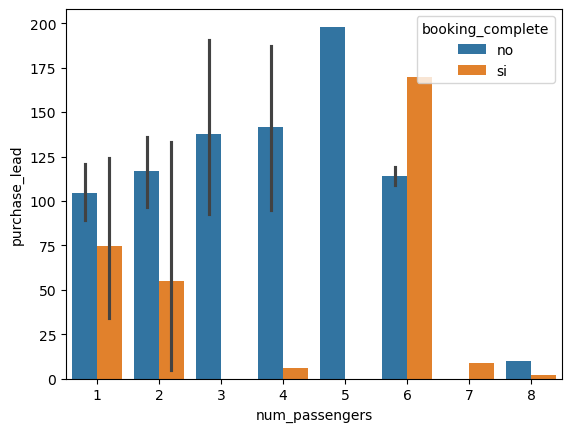

In [252]:
group = airline_filter_per_purchase_lead.loc[airline_filter_per_purchase_lead.trip_type == "OneWay",:]

group = group.groupby(["num_passengers","purchase_lead"])["booking_complete"].value_counts().to_frame().rename(columns={"booking_complete": "quantity"}).reset_index()
group.booking_complete = group.booking_complete.replace({0: "no", 1:"si"})


sns.barplot(data=group,x="num_passengers",y="purchase_lead",hue="booking_complete")

### 3. CircleTrip

<AxesSubplot:xlabel='num_passengers', ylabel='purchase_lead'>

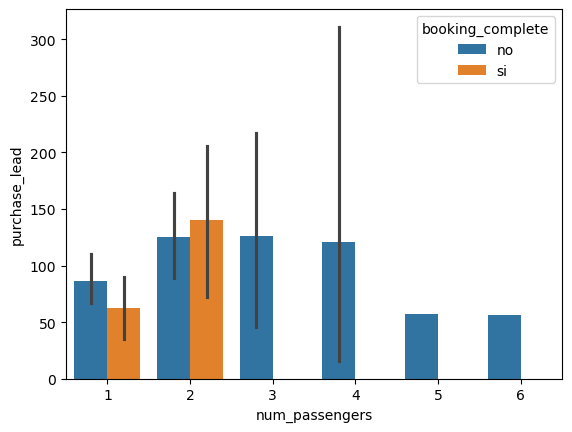

In [253]:
group = airline_filter_per_purchase_lead.loc[airline_filter_per_purchase_lead.trip_type == "CircleTrip",:]

group = group.groupby(["num_passengers","purchase_lead"])["booking_complete"].value_counts().to_frame().rename(columns={"booking_complete": "quantity"}).reset_index()
group.booking_complete = group.booking_complete.replace({0: "no", 1:"si"})


sns.barplot(data=group,x="num_passengers",y="purchase_lead",hue="booking_complete")

### Conclusiones:

1. El canal de venta preferido por los clientes es via Internet
3. La taza de reservas concretadas es mayor cuanto menor es el grupo de personas, siendo el pasaje unico el de mejores resultados
4. Hay una preferencia por tomar vuelos entre las 6 y 14 hs
5. RoundTrip es el tipo de viaje mas solicitado
6. RoundTrip es el tipo de viaje con mejor taza de concrecion de reserva para grupos de personas entre 1 y 3
7. La taza de concrecion de reserva para 7 pasajeros en OneWay es la mas alta en su tipo
8. OneWay tiene resultados muy desfavorables en general
9. CircleTrip es la peor categoria de tipo de vuelo, con una taza de concrecion muy baja, la cantidad de reservas no completas esta muuy por arriba de las completas
10. RoundTrip obtiuene resultados positivos para esperas menores a 200 dias
11. OnewWay obtiene resultados positivos para esperas menosres a 175 dias
12. CircleTrip muestra pocos resultados positivos, solo viendoloes en reservas con 1 o 2 pasajeros y menos de 150 dias de esera


------------------

### Análisis de reservas de vuelos - Conclusiones

+ Preferencias de clientes:

  1. Internet es el canal de venta predilecto.
  2. Las reservas para un solo pasajero presentan la tasa de concreción más alta, seguidas por grupos pequeños (2 a 4 personas).
  3. La franja horaria preferida se extiende entre las 6 y las 14 horas.
  4. RoundTrip es viaje más solicitado.
  5. Eficiencia en grupos pequeños. RoundTrip también brilla en la tasa de concreción para grupos de 1 a 3 personas.
  6. OneWay tiene resultados altibajos. OneWay presenta resultados positivos para esperas inferiores a 175 días, pero su tasa general de concreción es menos favorable. Aunque para 7 pasajeros se destaca con la tasa de concreción más alta dentro de su tipo.
  7. CircleTrip se ubica como la categoría con menor tasa de concreción, pero se ven resultados positivos se concentran en reservas con 1 o 2 pasajeros y esperas inferiores a 150 días.
  8. RoundTrip y OneWay crecen con esperas acotadas. Ambos tipos de viaje muestran mejores resultados para esperas menores a 200 y 175 días respectivamente.

#### Este análisis nos invita a reflexionar sobre las preferencias de los clientes impulsando a:

+ Fortalecer el canal de venta online.
+ Optimizar las estrategias para grupos grandes.
+ Enfocarnos en la mejora de CircleTrip.
